Betreut durch Dipl.-Biol. Ralf Darius  
WS2023 / 2024  
26. Feb 2024  
Hochschule Rhein-Waal

# Projektarbeit Data Mining and Machine Learning

## Analyse von Immobilienbewertungen

<p style="font-size: 2rem">
Till Wegener <a href="#fn1"><sup id="fn1-back">1</sup></a> und 
Dennis Adamczyk <a href="#fn2"><sup id="fn2-back">2</sup></a>
</p>

[<sup id="fn1">1</sup>](#fn1-back): Matrikelnummer: 28891, E-Mail-Adresse: till.wegener@hsrw.org  
[<sup id="fn2">2</sup>](#fn2-back): Matrikelnummer: 30545, E-Mail-Adresse: dennis.adamczyk@hsrw.org  


## Abstract

Die Analyse und Bewertung von Immobilien ist ein wichtiger Bestandteil des Immobilienmarktes. In dieser Arbeit wird ein Datensatz von Immobilienbewertungen aus Taiwan auf verschiedene Eigenschaften hin untersucht. Hierzu verwenden wir diverse Methoden aus den Bereichen des Data Mining und Machine Learning. Ziel ist es, die Bewertung von Immobilien, mithilfe einer linearen Regression, anhand verschiedener Eigenschaften vorherzusagen und zu analysieren.

Keywords:

*Data Mining, lineare Regression, multiple Regression, Immobilienmarkt*
<p style="page-break-after:always;"></p>

<h1>Inhaltsverzeichnis</h1>

<ol ol style="list-style-type: decimal;">
  <li><a href="#eigenständig">Eigenständigkeitserklärung</a></li>
  <li>
    <a href="#einleitung">Einleitung</a>
    <ol ol style="list-style-type: decimal;">
      <li><a href="#data">Vorstellung des Projektes</a></li>    
      <li><a href="#code">Vorbereitung Code</a></li>    
    </ol>
  </li>
  <li><a href="#datensatz">Betrachtung des Datensatzes</a></li>
  <li><a href="#deskriptiv">Deskriptive betrachtung des Datensatzes</a></li>

  <li>
    <a href="#reg">Regressionsmodelle</a>
    <ol ol style="list-style-type: decimal;">
        <li><a href="#multireg">Mehrfache Lineare Regression</a></li>
        <li><a href="#linreg">Lineare Regression</a></li>
    </ol>
  </li>
  <li><a href="#fazit">Fazit</a></li>
  <li><a href="#aufgaben">Aufgabenverteilung</a></li>
  
  <li><a href="#literaturverzeichnis">Literaturverzeichnis</a></li>
</ol>

# ! PUNKTE TODO
- multivariante Datenmatrix
- Passende variablen auswählen beschreiben
- beschreiben welche objekte wir verwenden
- standardisierung wenn nötig
- Merkmalsreduktion
- Modelle implementieren
- modelle vergleichen
- wenn zeit extra modelle implementieren
- Fazit
- Aufgabenverteilung


<h1 id="eigenständig">1 Eigenständigkeitserklärung</h2>


Hiermit erklären wir, dass wir die vorliegende Arbeit eigenständig und ohne fremde Hilfe angefertigt habe/n. Textpassagen, die wörtlich oder dem Sinn nach auf Publikationen oder Vorträgen anderer Autoren beruhen, sind als solche kenntlich gemacht.

<h1 id="einleitung">2 Einleitung</h2>

<h2 id="data">2.1 Vorstellung des Projektes</h2>

In dieser Arbeit betrachten wir den Datensatz ``Real Estate Valuation``<a href="#refdata">[1]</a> aus dem UCI Machine Learning Repository. Dieser Datensatz enthält Informationen über Immobilienbewertungen in Taiwan. Ziel unseres Projektes ist es, mithilfe unterschiedlicher Regressions-Verfahren zu überprüfen, ob der Wert pro Fläche abhängig von den diversen angegebenen Variablen ist. Dies würde es ermöglichen, für weitere Immobilien vorhersagen treffen zu können, bevor diese verkauft werden. Diese Vorhersagen könnten auch genutzt werden, um zu entscheiden ob eine Immobilie über oder unter dem erwartbaren Wert verkauft wird.

<h2 id="code">2.2 Vorbereitung Code</h2>

Bevor wir damit beginnen können die Daten zu analysieren, müssen wir sicherstellen das wir alle nötigen Python-Pakete installiert haben. Hierzu liegt diesem Notebook eine ``requirements.txt`` Datei bei. Der Python Paket-Manager ``PiP``<a href="#refpip">[2]</a> kann anhand dieser Datei die Pakete installieren. Dafür muss in diesem Ordner der folgende Kommando-Zeilen Befehl ausgeführt werden:

```cmd
pip install -r requirements.txt
```


Der erste Schritt für die bearbeitung des Datensatzes ist das Importieren der benötigten Bibliotheken. In unserem Fall verwenden wir die folgenden Bibliotheken:
- `pandas`<a href="#refpandas">[3]</a>  zur allgemeinen Datenverarbeitung
- `numpy`<a href="#refnumpy">[4]</a> zur numerischen Berechnung
- `matplotlib`<a href="#refmpl">[5]</a> zur Visualisierung der Daten
- `scikit-learn`<a href="#refsklearn">[7]</a> zur Implementierung der Regressionsmodelle

Hierzu genügt es, die Biliotheken zu importieren. Des Weiteren können wir hier festlegen, dass die Plots direkt im Notebook angezeigt werden sollen.

In [53]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Der nächste Schritt ist das Einlesen des Datensatzes. Hierzu können wir die Funktion ``ExcelFile`` von Pandas verwende. Diese Funktion ermöglicht es uns, die Daten aus einer Excel-Datei in ein ``DataFrame`` zu laden. Ein ``DataFrame`` ist eine zweidimensionale Datenstruktur, die von Pandas bereitgestellt wird. Ein ``DataFrame`` ist vergleichbar mit einer Tabelle in Excel. 

In [54]:
data = pd.read_excel("./data.xlsx")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


Als nächstes teilen wir den Datensatz in zwei Teile auf. Den großen Teil des Datensatzes (90%) verwenden wir für die weitere Arbeit in diesem Projekt. Die restlichen 10% des Datensatzes verwenden wir, um am Ende des Projektes die Genauigkeit des Modells zu überprüfen. Um sicherzustellen, dass die Aufteilung reproduzierbar ist, verwerden wir einen vordefinierten Seed. Für diese Aufgabe bietet und das `DataFrame` die Methode `sample`. Diese Methode gibt einen übergebenen Anteil des DataFrames zurück. Des Weiteren nimmt diese Methode einen Parameter ``random_state`` an, mit welchen wir die Pseudo-Zufällige Aufteilung reproduzierbar gestalten können.

In [55]:
seed = 1354
data_work = data.sample(frac=0.9, random_state=seed)
len(data_work)

373

Die Variable ``data_work`` beinhaltet nun die 90% der Daten welche wir für die weitere Arbeit verweden. Um nun den Test-Datensatz zu bestimmen können wir nun die Differenz aus ``data_work`` und ``data`` bilden.

In [56]:
data_test = data.drop(data_work.index)
len(data_test)

41

Wir können nun sicherstellen, dass wir keine Daten "veloren" haben, indem wir die Länge des ursprünglichen Datensatzes mit den beiden erstellen Datensätzen vergleichen.

In [57]:
assert(len(data_work) + len(data_test) == len(data))

Die beiden Teil-Datensätze können nun als `csv`-Dateien gespeichert. Hierzu können wir die Pandas-Funktion `to_csv` der `Dataframes` verwenden.

In [58]:
data_work.to_csv("data_work.csv", index=False)
data_test.to_csv("data_test.csv", index=False)

Nun sind wir bereit für die weitere Analyse der Daten.

<h1 id="datensatz">3 Betrachtung des Datensatzes</h2>

Der Datensatz ``Real Estate Valuation``<a href="#refdata">[1]</a> welchen wir betrachten besteht aus 414 Objekten. Jedes der Objekte bildet eine Bewertung einer Immobilie im Sindian Distrikt aus Taiwan ab. Für jedes Objekt ist der Preis pro normierte Fläche als Wert ``Y`` angegeben. Dieser Wert wird in der Einheit ``10000 New Taiwan Dollar/Ping`` angegeben. Hier hat ``1Ping`` eine Größe von ``3.3 Quadratmeter``. Zur Zeit der Verfassung dieses Projektberichtes (26. Feb 2024, 16:00 UTC) haben ``10000 New Taiwan Dollar`` einen Euro-Wert von ``291,97€``.

Umgeformt ist die Einheit dieser Variable also

$$ \frac{291.97€}{3.3m^2} \thickapprox {88.48€}/{m^2} $$

Diesen Faktor speichern wir uns für die spätere Verwendung.

In [59]:
# Umrechnungsfaktor von 10000 NT$/ping in Euro/m²
price_factor = 88.48

Die weiteren Variablen des Datensatzes sind:

- `X1` *Transaction date* - Datum 
- `X2` *House Age* - Alter der Immobilie in Jahren
- `X3` *Distance to nearest MRT Station* - Distanz zu der nächsten ``Mass Rapid Transit``-Station in Metern. In diesem Fall die ``Metro Taipei`` <a href="#refmrt">[6]</a>.
- `X4` *Number of convenience stores* - Nummer der Convenice-Stores (vgl. Mini-Markt) in Fußnähe
- `X5` *Latitude* - geografisches Breitengrad der Immobilie 
- `X6` *Longitude* - geografisches Längengrad der Immobilie 

Bei den Variablen `X1`, `X2`, `X3`, `X5` und `X6` handelt es sich um kontinuierliche Variablen. Die Variable `X4` hingegen ist eine diskrete Variable.

Bei der Variable `X1` ist zu beachten, dass das Datum nicht in einem normalen Datumsformat vorliegt. Das Datum wird hier als Zahl angegeben, wobei der Integer-Teil die Jahreszahl und der Dezimal-Teil den Prozentsatz des Jahres darstellt. Hierbei wird allerdings nur der Monat berücksichtigt. Dementsprechend ist der Wert ``2013.25`` als ``März 2013`` zu interpretieren.

Der Datensatz weißt auch eine Variable `No` auf, dies ist allerdings nur ein Index welcher keine statische Bedeutung ist. Dementsprechend werden wir diese in unseren Analysen nicht beachten.

Keine der Variablen weißt fehlende Werte auf. 

<h1 id="deskriptiv">4 Deskriptive betrachtung des Datensatzes</h2>

Werte für die deskriptive Beschreibung des Datensatzes können wir uns mithilfe der Funktion `describe` des ``DataFrames`` ausgeben lassen. Um die Werte leichter verständlich zu machen, wenden wir hier den zuvor bestimmten Umrechnungs-Faktor für den Preis pro Fläche an.

In [60]:
# deskriptive Statistik explizit nicht für 'ID'-Spalte
data_no_id = data.drop("No", axis=1)

# Umrechnung von NT$/ping in Euro/m²
data_no_id['Y house price of unit area'] = data_no_id['Y house price of unit area'] * price_factor

data_no_id.describe(percentiles=[])

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.00000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.96903,121.533361,3360.487498
std,0.281995,11.392485,1262.109595,2.945562,0.01241,0.015347,1203.902031
min,2012.666667,0.000000,23.382840,0.000000,24.93207,121.473530,672.448000
50%,2013.166667,16.100000,492.231300,4.000000,24.97110,121.538630,3402.056000
max,2013.583333,43.800000,6488.021000,10.000000,25.01459,121.566270,10396.400000


Anhand dieser Tabelle können die Werte `Anzahl`, `Mittelwert`, `Standardabweichung`, `Minimum`, `Median` (Äquivalent mit dem 50ten Perzentil) und `Maximum` der Variablen abgelesen werden.

Explizit können wir folgende Werte ablesen:

- Das durchschnittliche Alter der Immobilien beträgt 17.712 Jahre
- Die durchschnittliche Distanz zu der nächsten MRT-Station beträgt 1083.885 Meter
- Die durchschnittliche Anzahl der Convenience-Stores in Fußnähe beträgt 4.094
- Der durchschnittliche Preis pro Fläche beträgt $ 3306.487€/m^2 $
- Der Datensatz beinhält Transaktionen aus dem Zeitraum August 2012 bis Juli 2013
- Der Mittelwert und der Median der geografischen Koordinaten sind nahezu identisch. 

Die deskriptive Beschreibung des Datensatzes gibt uns einen ersten Eindruck über die Verteilung der Daten. Diese Daten können wir auch visuell darstellen. Hierzu können wir die Funktion `hist` des ``DataFrames`` verwenden. Diese Funktion erstellt für jede Variable ein Histogramm.

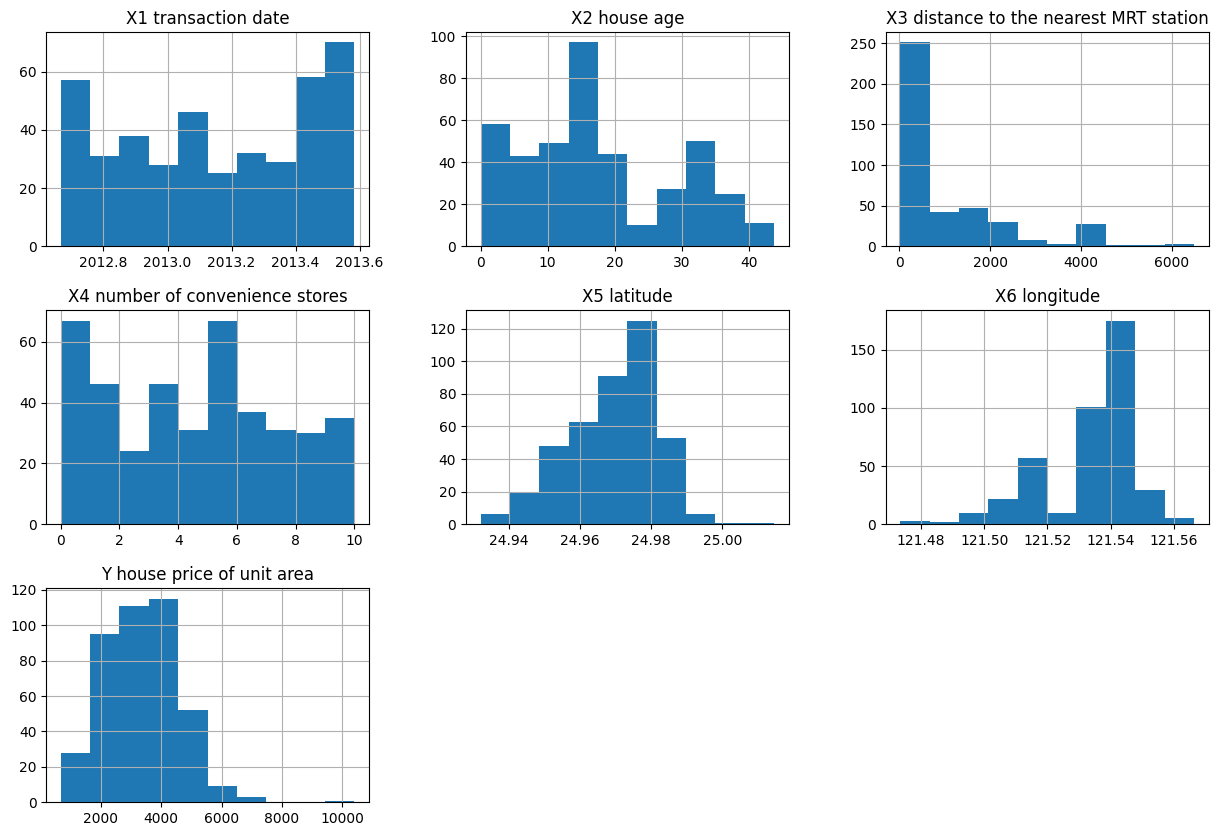

In [61]:
hist = data_no_id.hist(figsize=(15, 10))

Anhand der Histrogramme können wir weitere Informationen über die Verteilung der Daten ablesen. Die Variable `X3` weist eine linkssteile Verteilung auf. Die Variablen `X5` und `X6` weisen eine spitze Verteilung auf. Des Weiteren ist die Varianz der Werte sehr gering.

<h1 id="reg">5 Regressionsmodelle</h2>

Im folgenden schauen wir uns an, in wie weit es möglich ist, mithilfe verschiedener Regressionsmodelle den Preis pro Fläche vorherzusagen. Hierzu verwenden wir die Bibliothek `scikit-learn`<a href="#refsklearn">[7]</a>. Diese Bibliothek bietet uns diverse Funktionen zur Erstellung von Regressionsmodellen.

<h2 id="linreg">5.1 Lineare Regression</h2>

<h2 id="multireg">5.2 Mehrfache Lineare Regression</h2>

<h1 id="literaturverzeichnis">Literaturverzeichnis</h2>

<p id="refdata">[1] Yeh,I-Cheng. (2018). Real Estate Valuation. UCI Machine Learning Repository. https://doi.org/10.24432/C5J30W.</p>

<p id="refpip">[2] Python Paket-Manager pip - https://pypi.org/project/pip/ </p>

<p id="refpandas">[3] Pandas Python Bibliothek - https://pandas.pydata.org/ </p>

<p id="refnumpy">[4] Numpy Python Bibliothek - https://numpy.org/ </p>

<p id="refmpl">[5] Matplotlib Python Bibliothek - https://matplotlib.org/ </p>

<p id="refmrt">[6] Metro Taipei - https://english.metro.taipei/ </p>

<p id="refsklearn">[7] Scikit-learn - https://scikit-learn.org/stable/ </p>